In [ ]:
!kaggle datasets download -d "mlg-ulb/creditcardfraud"

In [1]:
import os
os.getcwd()
# os.chdir(default_path)

'C:\\Users\\hanjh\\Desktop\\Kaggle project\\Credit Fraud'

In [2]:
import zipfile 
with zipfile.ZipFile("creditcardfraud.zip", 'r') as file:
    file.extractall('creditcard')

In [3]:
os.listdir('creditcard')

['creditcard.csv']

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ParameterGrid, RepeatedKFold, StratifiedKFold, RepeatedStratifiedKFold, StratifiedKFold
from iterstrat.ml_stratifiers import RepeatedMultilabelStratifiedKFold
from sklearn.feature_selection import RFECV, VarianceThreshold, SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, mean_squared_error, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelBinarizer, label_binarize
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline as Pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from summarytools import dfSummary
from sklearn.metrics import roc_auc_score, RocCurveDisplay, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import colorama
from colorama import Fore, Style  # maakes strings colored
# !pip3 install termcolor
from termcolor import colored

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
credit_df = pd.read_csv("creditcard\\creditcard.csv")

In [6]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Feature Technicalities:
PCA Transformation: The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount).
Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)

In [9]:
print('No Fraud cases: ', round(credit_df['Class'].value_counts()[0]/len(credit_df) * 100, 2), '% of the dataset')
print('Fraud cases: ', round(credit_df['Class'].value_counts()[1]/len(credit_df) * 100, 2), '% of the dataset')

No Fraud cases:  99.83 % of the dataset
Fraud cases:  0.17 % of the dataset


### OverSampling / UnderSampling 
- **TomekLink** : Tomek Links is an under-sampling technique that was developed in 1976 by Ivan Tomek. It is one of a modification from Condensed Nearest Neighbors (CNN). It can be used to find desired samples of data from the majority class that is having the lowest Euclidean distance with the minority class data and then remove it.
    * Pros: It is less aggressive than other undersampling methods, which means it typically retains more data.
    * Cons: Computationally expensive in large dataset and it may not reduce the majroity class enough to achieve a balanced dataset.

<br/>

- **ClusterCentroids** : ClusterCentroids uses clustering algorithms like k-means to create clusters of the majority class and then replaces each cluster with its centroid. This reduces the number of majority class samples while keeping the overall distribution and characteristics of the class.
    - Pros: It reduces the dataset size significantly by representing large groups of majority class instances with centroids.
            Retains Data Distribution: By clustering and using centroids, the method retains some of the original data distribution. 
    - Cons: Since data points are replaced by centroids, some detailed information from the original data is lost.
            The effectiveness of the technique depends on the appropriate choice of the number of clusters, which might require experimentation.

<br/> 

- **RandomUnderSampler** : RandomUnderSampler randomly removes samples from the majority class until the class distribution is balanced. It’s the simplest form of undersampling.
    - Pros: It's straightforward and easy to implement. It is computationally efficient.
    - Cons: Randomly removing samples can lead to loss of important information, there’s a risk of introducing bias if certain subgroups of the majority class are underrepresented
 
<br/>

- **Condensed Nearest Neighbors(CNN)**: 
Condensed Nearest Neighbors (CNN) is an undersampling technique used to address class imbalance by refining the dataset through selective instance removal. CNN uses a nearest neighbor classifier to evaluate the importance of each instance. It condenses the dataset by removing instances that are less important or redundant. Specifically, it removes instances that are correctly classified by the nearest neighbors and that don’t contribute to defining the decision boundary <br/>
    - Pros: CNN significantly reduces the number of majority class samples, which decreases computational cost and storage requirements for training models / CNN focuses on retaining samples that are near the decision boundary between classes / Prevents Overfitting
    - Cons: Not Always Effective for Complex Boundaries / Computational Cost of Finding Nearest Neighbors


### 1. TomekLink

Combining SMOTE and Tomek Links

A combination of over-sampling the minority (abnormal) class and under-sampling the majority (normal) class can achieve better classifier performance than only under-sampling the majority class. This method was first introduced by Batista et al. (2003).

The process of SMOTE-Tomek Links is as follows.

1. Start of SMOTE: choose random data from the minority class.
2. Calculate the distance between the random data and its k nearest neighbors.
3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
4. Repeat step number 2–3 until the desired proportion of minority class is met (End of SMOTE).
5. Start of Tomek Links: choose random data from the majority class.
6. If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.

In [138]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a sample imbalanced dataset
X = credit_df.drop(columns='Class')
y = credit_df['Class']
print(f"Original class distribution: {Counter(y)}")

# Step 2: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Apply StandardScaler to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply SMOTE to the scaled training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
print(f"Class distribution after SMOTE: {Counter(y_train_smote)}")

# Step 5: Apply Tomek Links to clean up the data after SMOTE
tomek = TomekLinks(sampling_strategy='majority')
X_train_cleaned, y_train_cleaned = tomek.fit_resample(X_train_smote, y_train_smote)
print(f"Class distribution after Tomek Links: {Counter(y_train_cleaned)}")


Original class distribution: Counter({0: 284315, 1: 492})
Class distribution after SMOTE: Counter({0: 199008, 1: 199008})
Class distribution after Tomek Links: Counter({0: 199008, 1: 199008})


***No Tomek Links Detected:*** <br/>
Tomek Links identifies pairs of nearest neighbors from opposite classes where one instance is misclassified by its nearest neighbor. If there are no such pairs in the dataset, Tomek Links won't remove any instances. <br/>
In other words, after SMOTE, the synthetic samples may not create any Tomek Links if the decision boundaries are not affected significantly.

### 2. ClusterCentroid

Cluster Centroids is an undersampling technique that simplifies the majority class in an imbalanced dataset by using clustering. The goal is to reduce the number of majority class instances while retaining the dataset's overall structure and information.

### 3.Random Undersampler

In [96]:
from imblearn.under_sampling import RandomUnderSampler
column_names = X.columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns= column_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = column_names)

# Apply SMOTE to the scaled training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
print(f"Class distribution after SMOTE: {Counter(y_train_smote)}")

# Apply Random Undersampling to the data after SMOTE
random_undersampler = RandomUnderSampler(sampling_strategy={0:5000, 1:5000}, random_state=42) # 'auto' to custom sampling strategy 
X_train_resampled, y_train_resampled = random_undersampler.fit_resample(X_train_smote, y_train_smote)
print(f"Class distribution after Random Undersampling: {Counter(y_train_resampled)}")

Class distribution after SMOTE: Counter({0: 199008, 1: 199008})
Class distribution after Random Undersampling: Counter({0: 5000, 1: 5000})


Results:
1. No change in class distribution likely occurs because setting Random Undersampling strategy to 'auto' doesn't reduce the majority class enough after SMOTE balances the data. <br/>
2. Adjust the sampling_strategy in Random Undersampling to reduce the majority class more aggressively if needed.
3. Custom sampling strategy (group 0: 5000 and group 1: 5000)

### 4. Condensed Nearest Neighbors (CNN)

### Evaluation Metrics

Since this is unbalanced model and **False Negative** is very costly in the case of credit card fraud detection,
***Recall*** is a more important evaluation metrics than accuracy and precision.


Recal: True Positives/ (True Positive + False Negative).

In the case of credit card fraud detection, we want to avoid false negatives as much as possible. Fraud transactions cost us a lot and thus we want to take appropriate measures to prevent the If a fraudulent transaction is not detected (a false negative), the consequences can be severe. The customer might suffer financial loss, and the credit card issuer might face legal and reputational damage. 

**Note:**
Precision vs. Recall: While a high recall is essential, it often comes with a trade-off in precision (the proportion of predicted fraud cases that are actually fraud). This might mean more legitimate transactions are flagged as fraudulent (false positives), which can inconvenience customers. However, this is usually less costly than missing actual fraud.ud.

Is the positive class more important?
- Are False Negatives and False Positives Equally Important?
    - **Use F1-Measure**
- Are False Negatives More Important?
    - **Use F2-Measure**
- Are False Positives More Important?
    - **Use F0.5-Measure**

### Dealing with Imbalanced Dataset

Apply three following methods to Random Forest model and compare Recall and F2-Score

    1. Without Sampling technique
    2. SMOTE & Tomek Links
    3. SMOTE & Random Undersampler
    4. SMOTE & CNN

In [155]:
df = credit_df.copy()
df.drop_duplicates(inplace=True)
df = df.drop('Time', axis=1)

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [156]:
# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    return df

col_names = ['Amount']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

### Without Sampling technique

In [172]:
kf = StratifiedKFold(n_splits=3, shuffle=False)
rf = RandomForestClassifier(n_estimators=100, random_state=13)
#cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall')
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.79090909 0.79279279 0.7       ]
Average Cross Validation Recall score: 0.7612339612339613


In [173]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100],
    'max_depth': [4, 12],
    'random_state': [13]
}

grid_rf = GridSearchCV(rf, param_grid=params, cv=kf, 
                          scoring='recall').fit(X_train, y_train)

y_pred = grid_rf.predict(X_test)

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import fbeta_score, classification_report

cm = confusion_matrix(y_test, y_pred)

rf_Recall = recall_score(y_test, y_pred)
rf_Precision = precision_score(y_test, y_pred)
rf_f2 = fbeta_score(y_test, y_pred, beta=2, average='binary')
rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

[[84972     4]
 [   35   107]]


In [174]:
ndf = [(rf_Recall, rf_Precision, rf_f2, rf_accuracy)]

rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F2 Score', 'Accuracy'])
rf_score.insert(0, 'Random Forest with', 'No Under/Oversampling')
rf_score

,Random Forest with,Recall,Precision,F2 Score,Accuracy
0,No Under/Oversampling,0.753521,0.963964,0.787923,0.999542


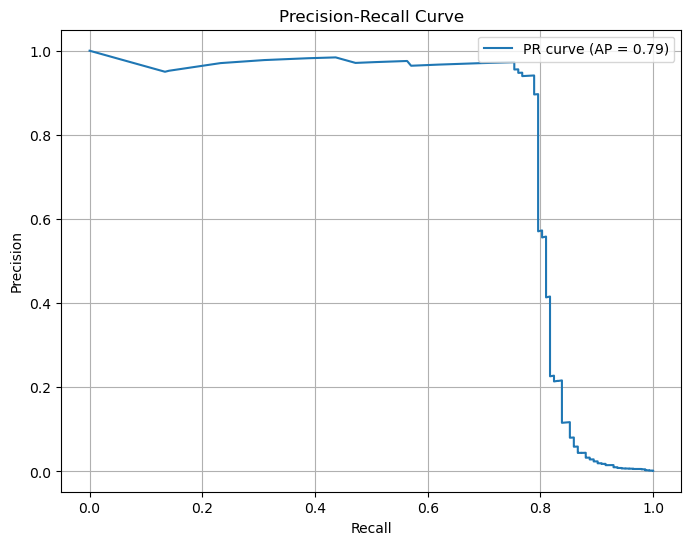

In [175]:
### PR Curve
y_probs = grid_rf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

# Step 4: Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#### SMOTETomek 
SMOTETomek is a combination of SMOTE and Tomek Links, where SMOTE first increases the minority class samples, and then Tomek Links removes overlapping majority class samples.

In [177]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)

# Apply SMOTETomek to the training data
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Check the class distribution after SMOTETomek
print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution: {Counter(y_resampled)}")

Original class distribution: Counter({0: 198277, 1: 331})
Resampled class distribution: Counter({0: 198277, 1: 198277})


The reduction in instances happens only in the majority class where Tomek Links identifies borderline pairs. However, this reduction tends to be small because Tomek Links is conservative—it only removes majority class instances that are very close to minority class instances (i.e., on the decision boundary).

As Tomek Links primarily focuses on cleaning up class overlap, it does not aggressively reduce the majority class size; its goal is to improve the class separation rather than drastically undersample the majority class.

***If you need a substantial reduction in the majority class size, other techniques like Random Undersampling or Cluster Centroids may be more appropriate***

Plus, If there is no change in class distribution between using SMOTETomek and SMOTE alone, it suggests that Tomek Links is not identifying any borderline samples between the majority and minority classes to remove.
the classes are already well-separated in feature space (i.e., there's little to no overlap between the majority and minority classes), then Tomek Links won’t find any pairs to remove. In this case, SMOTETomek behaves just like SMOTE because Tomek Links doesn't perform any undersampling.


In [179]:
from imblearn.pipeline import make_pipeline  # Use imblearn's make_pipeline
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Step 1: Define SMOTETomek and RandomForestClassifier in the pipeline
SMOTETomek_pipeline = make_pipeline(SMOTETomek(sampling_strategy='auto'),  # Automatically handle TomekLinks
                                    RandomForestClassifier(n_estimators=100, random_state=13))

# Step 2: Use StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=3, shuffle=False)

# Step 3: Perform cross-validation with recall as the scoring metric
score = cross_val_score(SMOTETomek_pipeline, X_train, y_train, scoring='recall', cv=kf)

# Step 4: Print the cross-validation results
print("Cross Validation Recall Scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))


Cross Validation Recall Scores are: [0.85454545 0.78378378 0.77272727]
Average Cross Validation Recall score: 0.8036855036855037


In [180]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params} 
SMOTETomek_rf = GridSearchCV(SMOTETomek_pipeline, param_grid=new_params, cv=kf, scoring='recall', return_train_score=True) 
SMOTETomek_rf.fit(X_train, y_train)

y_pred = SMOTETomek_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

SMOTETomek_rf_Recall = recall_score(y_test, y_pred)
SMOTETomek_rf_Precision = precision_score(y_test, y_pred)
SMOTETomek_rf_f2 = fbeta_score(y_test, y_pred, beta=2, average='binary')
SMOTETomek_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

ndf = [(SMOTETomek_rf_Recall, SMOTETomek_rf_Precision, SMOTETomek_rf_f2, SMOTETomek_rf_accuracy)]

SMOTETomek_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F2 Score', 'Accuracy'])
SMOTETomek_rf_score.insert(0, 'Random Forest with', 'SMOTE + Tomek')
SMOTETomek_rf_score

[[84530   446]
 [   22   120]]


,Random Forest with,Recall,Precision,F2 Score,Accuracy
0,SMOTE + Tomek,0.84507,0.212014,0.529101,0.994502


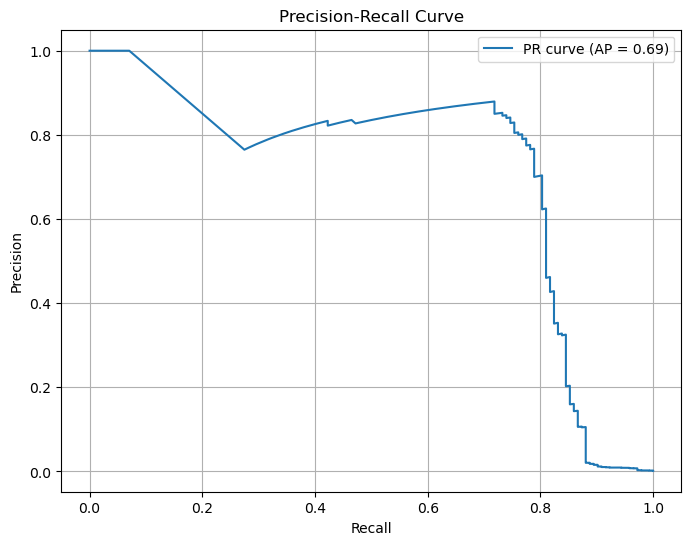

In [181]:
### PR Curve
y_probs = SMOTETomek_rf.predict_proba(X_test)[:, 1]

# Step 2: Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Step 3: Calculate the average precision score
average_precision = average_precision_score(y_test, y_probs)

# Step 4: Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### SMOTE & Customized Undersampling

In [161]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Step 1: Define SMOTE and UnderSampler in the imblearn pipeline
UnderSample_pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # SMOTE to oversample the minority class
    ('undersample', RandomUnderSampler(sampling_strategy={0:5000, 1:5000}, random_state=42)),  # RandomUnderSampler to undersample the majority class
    ('rf', RandomForestClassifier(random_state=13))  # RandomForestClassifier for model training
])

# Step 2: Use StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=3, shuffle=False)

# Step 3: Perform cross-validation with recall as the scoring metric
score1 = cross_val_score(UnderSample_pipeline, X_train, y_train, scoring='recall', cv=kf)

# Step 4: Print the cross-validation results
print("Cross Validation Recall Scores are: {}".format(score1))
print("Average Cross Validation Recall score: {}".format(score1.mean()))

Cross Validation Recall Scores are: [0.87272727 0.85585586 0.82727273]
Average Cross Validation Recall score: 0.851951951951952


In [162]:
# Step 4: Apply SMOTE and RandomUnderSampler without fitting the model yet
# You need to extract the data at this point to check class distribution
X_train_resampled, y_train_resampled = UnderSample_pipeline.named_steps['smote'].fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = UnderSample_pipeline.named_steps['undersample'].fit_resample(X_train_resampled, y_train_resampled)

# Step 5: Check class distribution after SMOTE and Random Undersampling
print(f"Class distribution after SMOTE and Random Undersampling: {Counter(y_train_resampled)}")

Class distribution after SMOTE and Random Undersampling: Counter({0: 5000, 1: 5000})


In [165]:
params = {
    'n_estimators': [50, 100],
    'max_depth': [4, 12],
    'random_state': [13]
}

new_params = {'rf__' + key: params[key] for key in params}
SMOTE_under_rf = GridSearchCV(UnderSample_pipeline, param_grid=new_params, cv=kf, scoring='recall', return_train_score=True)
SMOTE_under_rf.fit(X_train, y_train)

y_pred = SMOTE_under_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

SMOTE_under_rf_Recall = recall_score(y_test, y_pred)
SMOTE_under_rf_Precision = precision_score(y_test, y_pred)
SMOTE_under_rf_f2 = fbeta_score(y_test, y_pred, beta=2, average='binary')
SMOTE_under_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

ndf = [(SMOTE_under_rf_Recall, SMOTE_under_rf_Precision, SMOTE_under_rf_f2, SMOTE_under_rf_accuracy)]

SMOTETomek_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F2 Score', 'Accuracy'])
SMOTETomek_rf_score.insert(0, 'Random Forest with', 'SMOTE + RandomUnderSampler')
SMOTETomek_rf_score

[[84460   516]
 [   22   120]]


,Random Forest with,Recall,Precision,F2 Score,Accuracy
0,SMOTE + RandomUnderSampler,0.84507,0.188679,0.498339,0.993679


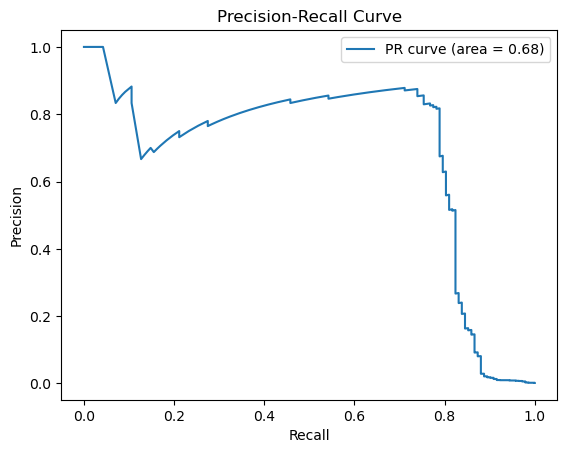

           Random Forest with   Recall  Precision  F2 Score  Accuracy
0  SMOTE + RandomUnderSampler  0.84507   0.188679  0.498339  0.993679


In [170]:
### PR CURVE (Precision, Recall)
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
import matplotlib.pyplot as plt

y_pred_proba = SMOTE_under_rf.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

# Step 6: Calculate Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Step 7: Plot the Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Step 8: Display evaluation scores in a DataFrame
ndf = [(SMOTE_under_rf_Recall, SMOTE_under_rf_Precision, SMOTE_under_rf_f2, SMOTE_under_rf_accuracy)]
SMOTETomek_rf_score = pd.DataFrame(data=ndf, columns=['Recall','Precision','F2 Score', 'Accuracy'])
SMOTETomek_rf_score.insert(0, 'Random Forest with', 'SMOTE + RandomUnderSampler')
print(SMOTETomek_rf_score)

#### SMOTE & CondensedNearestNeighbour (CNN)

In [ ]:
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score, fbeta_score, accuracy_score

# Step 1: Define SMOTE and CondensedNearestNeighbour in the imblearn pipeline
SMOTE_CNN_pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),  # SMOTE to oversample the minority class
    ('cnn', CondensedNearestNeighbour(sampling_strategy='auto', random_state=42)),  # CNN to undersample the majority class
    ('rf', RandomForestClassifier(random_state=13))  # RandomForestClassifier for model training
])

# Step 2: Use StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=3, shuffle=False)

# Step 3: Perform cross-validation with recall as the scoring metric
score1 = cross_val_score(SMOTE_CNN_pipeline, X_train, y_train, scoring='recall', cv=kf)

# Step 4: Print the cross-validation results
print("Cross Validation Recall Scores are: {}".format(score1))
print("Average Cross Validation Recall score: {}".format(score1.mean()))

In [ ]:
# Step 5: Define hyperparameters for Random Forest and perform GridSearchCV
params = {
    'n_estimators': [50, 100],
    'max_depth': [4, 12],
    'random_state': [13]
}

new_params = {'rf__' + key: params[key] for key in params}
SMOTE_CNN_rf = GridSearchCV(SMOTE_CNN_pipeline, param_grid=new_params, cv=kf, scoring='recall', return_train_score=True)
SMOTE_CNN_rf.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model on the test set
y_pred = SMOTE_CNN_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

SMOTE_CNN_rf_Recall = recall_score(y_test, y_pred)
SMOTE_CNN_rf_Precision = precision_score(y_test, y_pred)
SMOTE_CNN_rf_f2 = fbeta_score(y_test, y_pred, beta=2, average='binary')
SMOTE_CNN_rf_accuracy = accuracy_score(y_test, y_pred)

print(cm)

ndf = [(SMOTE_CNN_rf_Recall, SMOTE_CNN_rf_Precision, SMOTE_CNN_rf_f2, SMOTE_CNN_rf_accuracy)]

# Create a DataFrame to store and display the scores
SMOTE_CNN_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F2 Score', 'Accuracy'])
SMOTE_CNN_rf_score.insert(0, 'Random Forest with', 'SMOTE + CNN')
print(SMOTE_CNN_rf_score)

In [ ]:
y_probs = SMOTE_CNN_rf.predict_proba(X_test)[:, 1]

# Step 2: Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Step 3: Calculate the average precision score
average_precision = average_precision_score(y_test, y_probs)

# Step 4: Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SMOTE + CNN')
plt.legend(loc='best')
plt.grid(True)
plt.show()


### Conclusion
When dealing with an extremely imbalanced dataset, such as the one you described (99.83% genuine and 0.17% fraud), the performance metrics, particularly those related to Precision-Recall (PR) curves, can behave in counterintuitive ways. ***Here's why the model without any sampling techniques might have a higher Average Precision (AP) score:***

1. Class Imbalance and Precision:
Precision is defined as the proportion of true positive predictions among all positive predictions (i.e., 
Precision = TP/(TP+FP)
In an extremely imbalanced dataset, the model can achieve a high precision score by simply predicting the majority class (genuine) for most instances. Since fraud cases are rare, there are fewer opportunities to make false positive errors (predicting fraud when it is genuine), leading to artificially high precision.

3. Average Precision (AP) and Skewed Predictions:
Average Precision (AP) is the area under the Precision-Recall curve. In a highly imbalanced dataset, the model without sampling techniques might "learn" that predicting the majority class most of the time is the optimal strategy, which leads to a high precision score but often at the cost of low recall (missing many actual fraud cases).
This high precision can inflate the AP score, even if the model is not good at detecting the minority class (fraud).

4. Effect of Sampling Techniques:
SMOTE + Tomek Links and SMOTE + Random Undersampling: These techniques aim to balance the dataset by either oversampling the minority class or undersampling the majority class. While this can improve the model's ability to detect the minority class (fraud), it often results in a trade-off between precision and recall.
Precision Trade-off: By increasing the number of positive (fraud) predictions, the model is more likely to identify fraud cases (improving recall). However, this also increases the chances of false positives (predicting fraud when it's actually genuine), which can lower precision and, consequently, the AP score.

In summary, the high AP score in the unsampled model doesn't necessarily mean it is better at identifying fraud; it just means it makes fewer incorrect positive predictions, which is a direct result of the extreme class imbalance. The models with sampling techniques might be better in terms of detecting fraud (higher recall) but show a lower AP due to a higher rate of false positives.